In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk

In [83]:
df = pd.read_csv('flipkart_reviews.csv')

In [84]:
df.shape

(2304, 3)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


In [90]:
print('Null Value count')
df.isnull().sum()

Null Value count


Product_name    0
Review          0
Rating          0
dtype: int64

In [105]:
df[df.duplicated() !=False]

,Product_name,Review,Rating
240,"realme C25_Y (Glacier Blue, 64 GB) (4 GB RAM)",Nice product,5
250,"realme C25_Y (Metal Grey, 64 GB) (4 GB RAM)",Nice product,5
260,"realme C25_Y (Glacier Blue, 128 GB) (4 GB RAM)",Nice product,5
280,"realme C25_Y (Metal Grey, 128 GB) (4 GB RAM)",Nice product,5
491,Whirlpool 190 L Direct Cool Single Door 2 Star...,Good,5
...,...,...,...
1571,"realme C25Y (Metal Grey, 64 GB) (4 GB RAM)",Osm mobile volue for money 🤑 realme is good co...,4
1572,"realme C25Y (Metal Grey, 64 GB) (4 GB RAM)",Super camera at night,5
1573,"realme C25Y (Metal Grey, 64 GB) (4 GB RAM)",Nice phone... best 😍,5
2095,"Candes 7.2 kg Semi Automatic Top Load Blue, Wh...",Best,5


In [100]:
df.tail()

,Product_name,Review,Rating
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5
2303,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Worth the money u spend for this monitor Great...,5


In [49]:
df[df.columns[1:]].values

array([['Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs',
        5],
       ['Good perfomence...', 5],
       ["Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",
        5],
       ...,
       ['Awesome', 5],
       ['Only one issue with adapter', 5],
       ['Worth the money u spend for this monitor Great deal Using for cctv footage monitorWonderful built MSI brand which we can trust for',
        5]], dtype=object)

In [6]:
df.shape

(2304, 3)

In [182]:
df['Rating'].value_counts().sort_values(ascending=False)[:5]

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64

In [168]:
len(df.RA.unique())

231

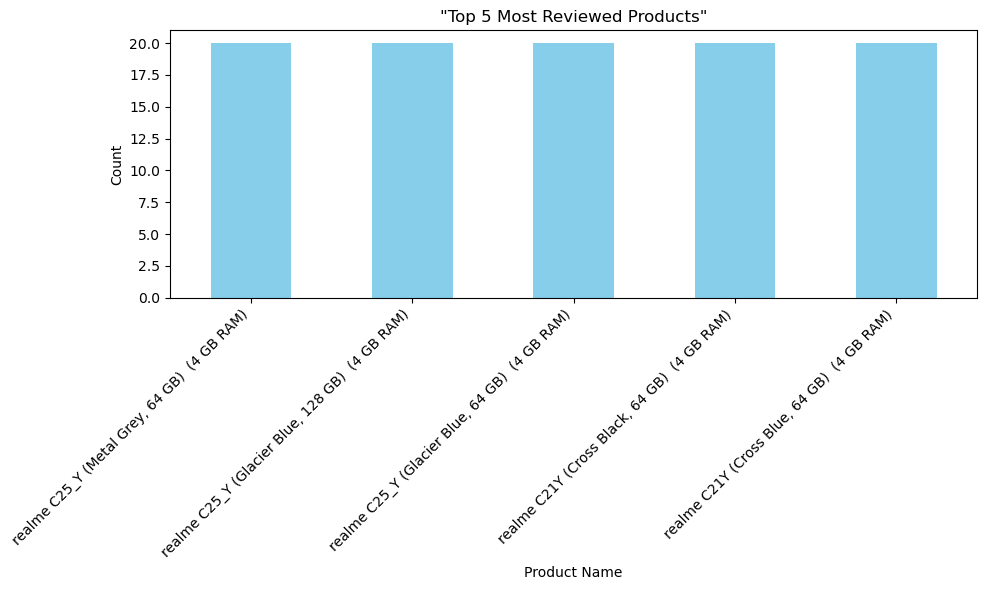

In [180]:
import matplotlib.pyplot as plt

# Get the top 5 product names with the highest counts
top_products = df['Product_name'].value_counts().sort_values(ascending=False)[:5]

# Plotting
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('"Top 5 Most Reviewed Products"')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


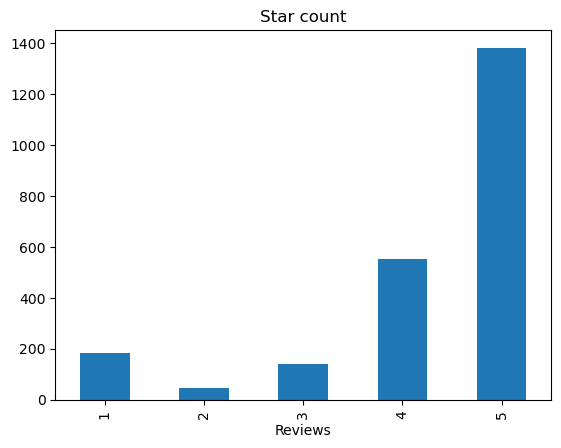

In [7]:
gr = df.Rating.value_counts().sort_index().plot(kind = 'bar',title = 'Star count')
gr.set_xlabel('Reviews')
plt.show()

In [8]:
testing = df.Review.values[2]

In [9]:
tokens = nltk.word_tokenize(testing)

In [10]:
tags = nltk.pos_tag(tokens)

In [11]:
# nltk.download('punkt')

In [12]:
# nltk.download('averaged_perceptron_tagger')

In [13]:
chunk = nltk.chunk.ne_chunk(tags)

In [14]:
# nltk.download('maxent_ne_chunker')

In [15]:
# nltk.download('words')

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [17]:
from tqdm.notebook import tqdm

In [18]:
# nltk.download('vader_lexicon')

In [19]:
sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores(df.Review.values[0])

{'neg': 0.073, 'neu': 0.613, 'pos': 0.314, 'compound': 0.9579}

In [21]:
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores

In [22]:
sentiment_scores = df['Review'].apply(get_sentiment_scores)

In [23]:
sentiment_scores[0]

{'neg': 0.073, 'neu': 0.613, 'pos': 0.314, 'compound': 0.9579}

In [24]:
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

In [25]:
sia.polarity_scores(df.Review.values[0])

{'neg': 0.073, 'neu': 0.613, 'pos': 0.314, 'compound': 0.9579}

In [43]:
df.tail()

,Product_name,Review,Rating
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5
2303,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Worth the money u spend for this monitor Great...,5


In [63]:
testing = df[df.columns]

In [ ]:
testing 

In [66]:
sentiment_df

,neg,neu,pos,compound
0,0.073,0.613,0.314,0.9579
1,0.000,0.256,0.744,0.4404
2,0.000,0.881,0.119,0.5789
3,0.000,0.432,0.568,0.8808
4,0.000,0.533,0.467,0.8360
...,...,...,...,...
2299,0.000,0.631,0.369,0.6249
2300,0.000,0.745,0.255,0.6249
2301,0.000,0.000,1.000,0.6249
2302,0.000,1.000,0.000,0.0000


In [27]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [72]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
sia.polarity_scores(testing)

{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.5789}

In [30]:
encoded_text = tokenizer(testing,return_tensors = 'pt')

In [31]:
op = model(**encoded_text)

In [32]:
op

SequenceClassifierOutput(loss=None, logits=tensor([[-1.0724,  0.2172,  1.0358]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [33]:
scores = op[0][0].detach().numpy()

In [34]:
scores = softmax(scores)

In [35]:
scores

array([0.07773612, 0.28226638, 0.6399975 ], dtype=float32)

In [36]:
scores_dict = {
    'robertneg': scores[0],'robertnut': scores[1],'robertnpos': scores[2]
}

In [37]:
scores_dict

{'robertneg': 0.07773612, 'robertnut': 0.28226638, 'robertnpos': 0.6399975}

In [38]:
def polairty_scores_robert(text):
    encoded_text = tokenizer(testing,return_tensors = 'pt')
    op = model(**encoded_text)
    scores = op[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {'robertneg': scores[0],'robertnut': scores[1],'robertnpos': scores[2]}
    return scores_dict

In [44]:
robert_scores = df['Review'].apply(polairty_scores_robert)

KeyboardInterrupt: 

In [40]:
df.Review.values[2]

"Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games."

In [41]:
robert_scores

0       {'neg': 0.073, 'neu': 0.613, 'pos': 0.314, 'co...
1       {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
2       {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...
3       {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'comp...
4       {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'comp...
                              ...                        
2299    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
2300    {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...
2301    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
2302    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2303    {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...
Name: Review, Length: 2304, dtype: object

In [73]:
import torch
def calculate_sentiment_scores(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probabilities = softmax(outputs.logits, axis=1).flatten().tolist()

    # Return sentiment scores as a list
    return probabilities

In [57]:
df[df.Rating == 1]

,Product_name,Review,Rating
39,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Display so bad quality and wifi connectivity i...,1
65,ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windo...,Very bad experience,1
83,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,Speakers are completely not working well.worst...,1
84,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,Start Hanging within a week,1
170,"realme C25Y (Metal Grey, 128 GB) (4 GB RAM)",Poor camera quality Infact same time not worki...,1
...,...,...,...
2103,Lenovo 27 inch Full HD VA Panel with TUV Eye C...,Worst moniter dont buy this,1
2120,ZEBRONICS 18.5 inch HD Monitor (ZEB-V19HD LED)...,Please don't buy if you want to use it as desk...,1
2172,Lenovo 18.5 inch HD TN Panel Monitor (D19-10) ...,Monitor is worst .side view is not good heavy ...,1
2175,Lenovo 18.5 inch HD TN Panel Monitor (D19-10) ...,1 year back my lenovo order not nice very bad ...,1


In [58]:
df.Review.iloc[65]

'Very bad experience'

In [82]:
calculate_sentiment_scores("Beautiful Product Must buy")

[0.004068879876285791, 0.031524427235126495, 0.9644066691398621]

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [68]:
sentiment_df.columns.tolist()

['neg', 'neu', 'pos', 'compound']

In [69]:
testing[sentiment_df.columns.tolist()] = sentiment_df

In [71]:
testing.to_csv('vaders.csv')

In [80]:
import pickle
with open("tokenizer.pickle", "wb") as f:
    pickle.dump(tokenizer, f)

with open("model.pickle", "wb") as f:
    pickle.dump(model, f)

In [162]:
one = df[df.Rating == 1]

In [163]:
one

,Product_name,Review,Rating
39,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Display so bad quality and wifi connectivity i...,1
65,ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windo...,Very bad experience,1
83,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,Speakers are completely not working well.worst...,1
84,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,Start Hanging within a week,1
170,"realme C25Y (Metal Grey, 128 GB) (4 GB RAM)",Poor camera quality Infact same time not worki...,1
...,...,...,...
2103,Lenovo 27 inch Full HD VA Panel with TUV Eye C...,Worst moniter dont buy this,1
2120,ZEBRONICS 18.5 inch HD Monitor (ZEB-V19HD LED)...,Please don't buy if you want to use it as desk...,1
2172,Lenovo 18.5 inch HD TN Panel Monitor (D19-10) ...,Monitor is worst .side view is not good heavy ...,1
2175,Lenovo 18.5 inch HD TN Panel Monitor (D19-10) ...,1 year back my lenovo order not nice very bad ...,1


In [150]:
one.Review.values[0]

'Display so bad quality and wifi connectivity ia also poor, camera vry poor. Not UP to the mark.'

In [164]:
print(one.Review.values[0])
calculate_sentiment_scores(one.Review.values[0])

Display so bad quality and wifi connectivity ia also poor, camera vry poor. Not UP to the mark.


[0.928523063659668, 0.06467998772859573, 0.006796965375542641]